In [16]:
import pandas as pd
df = pd.read_csv("weight-height.csv").sample(100) # read csv files with sample 100 data
df.head() # show first 5 data

,Height,Weight
6956,58.490467,93.192439
3430,69.591180,197.363130
4627,68.476617,176.762772
1871,71.293931,202.944771
7976,61.895693,113.043300


In [17]:
df.tail(3) # show last 3 data

,Height,Weight
2256,67.004076,190.555592
7719,61.803491,130.442536
6258,70.544306,196.107116


In [18]:
df.shape # how many row and column 

(100, 2)

In [19]:
df.columns # show the column name

Index(['Height', 'Weight'], dtype='object')

In [20]:
df.isna().sum() # calculate total num of null value in the data set

Height    0
Weight    0
dtype: int64

In [21]:
df.info() # display data frame information

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 6956 to 6258
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  100 non-null    float64
 1   Weight  100 non-null    float64
dtypes: float64(2)
memory usage: 2.3 KB


In [22]:
df.describe() # display statistical description

,Height,Weight
count,100.000000,100.000000
mean,67.317875,169.490702
std,4.336518,34.805440
min,58.490467,93.192439
25%,63.902087,141.523750
50%,67.819716,176.714365
75%,70.715390,196.877088
max,76.501883,232.635403


In [23]:
#eda
#!pip install matplotlib

Text(0.5, 1.0, 'conbination of hegit and weight')

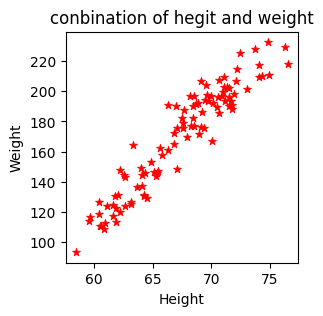

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(3,3))
plt.scatter(df["Height"], df["Weight"], color ="r",marker= "*", linewidths= .55) # scatter plot of height and wight as x and y
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("conbination of hegit and weight")


In [34]:
df.head()

,Height,Weight
6956,58.490467,93.192439
3430,69.591180,197.363130
4627,68.476617,176.762772
1871,71.293931,202.944771
7976,61.895693,113.043300


In [35]:
x = df[["Height"]] # define x = height
y = df[["Weight"]] # define y = weight

In [36]:
#x = df.drop("Weight")
#y = df["Weight"]

In [38]:
x.head()

,Height
6956,58.490467
3430,69.591180
4627,68.476617
1871,71.293931
7976,61.895693


In [39]:
y.head()

,Weight
6956,93.192439
3430,197.363130
4627,176.762772
1871,202.944771
7976,113.043300


In [42]:
#pip install scikit-learn # scikit-learn need to be install first

In [43]:
from sklearn.model_selection import train_test_split # import train_test_split

In [72]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, train_size=.8,random_state=1) # split test and train size to 20% and 80% 

In [73]:
xtrain.head()

,Height
4627,68.476617
2852,67.608067
2256,67.004076
3016,67.459899
5199,64.234470


In [74]:
ytrain.head()

,Weight
4627,176.762772
2852,178.886205
2256,190.555592
3016,182.629348
5199,130.219638


In [75]:
xtest.head()

,Height
7164,60.815059
342,69.749523
5429,65.236322
2293,74.034598
5325,63.973448


In [76]:
ytest.head()

,Weight
7164,108.708421
342,193.476259
5429,143.939348
2293,217.815798
5325,149.408993


In [66]:
xtrain.shape

(80, 1)

In [59]:
ytrain.shape

(80, 1)

In [60]:
xtest.shape

(20, 1)

In [77]:
#linear regression
from sklearn.linear_model import LinearRegression #import linear regression model
lr = LinearRegression() # create linear regression object

In [78]:
lr

LinearRegression()

In [79]:
lr.fit(xtrain,ytrain) # train data

LinearRegression()

In [80]:
lr.score(xtrain,ytrain) #calculate accuracy of train data. 1 is perfect

0.8942569880113391

In [81]:
lr.score(xtest, ytest) #calculate accuracy of test data. 1 is perfect

0.9132582721829705

In [85]:
lr.predict([[60.815059]]) #predict one fixed value

C:\Users\CreativeIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[120.73362848]])

In [91]:
df["predit1"] = lr.predict(df[["Height"]]) # predit height with LR model

In [92]:
df.head() # show with predict value

,Height,Weight,predit1
6956,58.490467,93.192439,103.231788
3430,69.591180,197.363130,186.808994
4627,68.476617,176.762772,178.417460
1871,71.293931,202.944771,199.629001
7976,61.895693,113.043300,128.869719


In [90]:
df.head()

,Height,Weight
6956,58.490467,93.192439
3430,69.591180,197.363130
4627,68.476617,176.762772
1871,71.293931,202.944771
7976,61.895693,113.043300


In [94]:
df["error"]= df["Weight"] - df["predit1"] # calculate error for each 
df.head()

,Height,Weight,predit1,error
6956,58.490467,93.192439,103.231788,-10.039350
3430,69.591180,197.363130,186.808994,10.554135
4627,68.476617,176.762772,178.417460,-1.654688
1871,71.293931,202.944771,199.629001,3.315770
7976,61.895693,113.043300,128.869719,-15.826419


In [95]:
pre = lr.predict(xtest) # predict test data

In [96]:
pre

array([[120.73363172],
       [188.00115585],
       [154.02129227],
       [220.26346334],
       [144.51312121],
       [158.47442735],
       [138.18073132],
       [178.07260158],
       [178.975336  ],
       [222.62671985],
       [138.3016213 ],
       [154.98060226],
       [236.86315646],
       [200.96723123],
       [165.74910088],
       [193.16023145],
       [142.36400368],
       [182.90142378],
       [197.23899256],
       [197.83508865]])

Text(0.5, 1.0, 'conbination of hegit and weight')

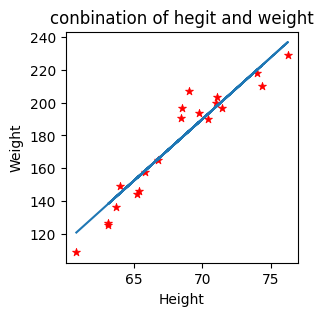

In [99]:
plt.figure(figsize=(3,3))
plt.scatter(xtest,ytest, color ="r",marker= "*", linewidths= .55)
plt.plot(xtest, lr.predict(xtest)) # scatter plot with best fit line with xtest data
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("conbination of hegit and weight")

Text(0.5, 1.0, 'conbination of hegit and weight')

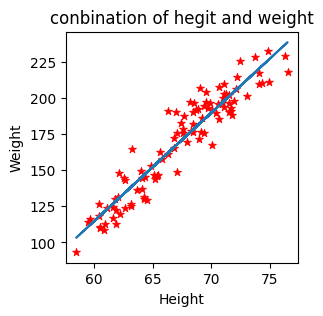

In [97]:
import matplotlib.pyplot as plt
plt.figure(figsize=(3,3))
plt.scatter(df["Height"], df["Weight"], color ="r",marker= "*", linewidths= .55)
plt.plot(xtrain, lr.predict(xtrain)) # plot scatter plot with best fit line for xtrain data
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("conbination of hegit and weight")

Text(0.5, 1.0, 'conbination of hegit and weight')

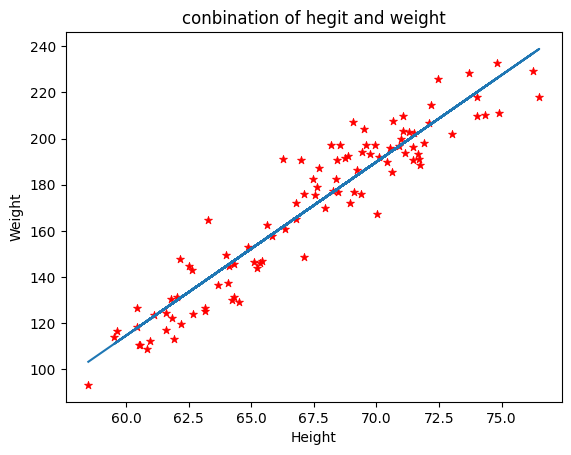

In [101]:
plt.scatter(x,y, color ="r",marker= "*", linewidths= .55)
plt.plot(x, lr.predict(x)) # for x data
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("conbination of hegit and weight")

In [103]:
from sklearn.metrics import mean_squared_error as mse # import MSE
from sklearn.metrics import mean_absolute_error as mae # import MAE

In [104]:
MSE = mse(xtest,ytest) # calculate mse 

In [105]:
MSE

12293.328944694824

In [106]:
MAE = mae(xtest,ytest) # calculate mae

In [107]:
MAE

106.58106795900001

In [110]:
#y = mx + c

m = lr.coef_ # slop
c = lr.intercept_ #intercept

In [111]:
m

array([[7.52899452]])

In [112]:
c

array([-337.14261771])

In [114]:
y = m * 68.476617 + c # check for the fixed x value
y

array([[178.41745671]])